# Modelling Energy Consumption in Paris using weather variables  for the year 2017

## Problem Statement 

Weather affects different decision that people make, for example If you are cold you end up trying to find something hot that can warm you and if you hot you try to find something that can make you cold. Similary, there is business that efficiently operate in sunny days and others operate in rain seasons. From these examples, most of the activities depends on the weather. However, it is important to use data to understand if this relationship statistically exist and leverage on this relationship to make informed decisions. In this project, we will analyze relationship between energy consumption and weather in Paris using dataset for the year of 2017.

   ## Objective of the project 

- Modelling Energy Consumption using mean temperature
- Modelling Energy Consumption using weather variables 
- Understanding the relationship between energy consumption and weather in Paris for the year 2017
- Evaluating different models by using feature engineering 

## Potential Project constraints  

- **Data Access:** One of the main problem in data analysis project is access to the data but since this would be addressed by finding out if the datasets are openly available online and if it is not, it would be solved by contacting responsible agencies if France explaining the relevance of the project and how they can benefit from it so that they can provide access to datasets. 

- **Data Quality:** Even dataset are available, there might challenges in quality of the data but if the data can be improved by different techniques data cleaning techniques.

- **Budget constraint:** Since this is an individual project, I can only need budget in case there is a need to pay some fee in order to access datasets. 

## Steps in Addressing the Problem  

- **Finding the Data Sources**: It is important first to identify the data sources of the dataset in the project but luckily I had access to the dataset from my Professor.

- **Loading Dataset** 

- **Data Visualization to understand dataset:** . 

- **Modelling** 

## Technologies and Packages used

- **Python**

- **Pandas**: For data analysis  

- **Numpy**: For Data Manipulation . 

- **Matplotlib**: For visualization
---------------------------------------------------------------------------------------------------------------------

# Technical Part ( Coding)

In the process of understating the dataset, I have realized that the dataset is provided contains the records for the year of 2017. The dataset was composed of 365 records and 21 columns. Before interpolation, It is important to check for all missing values in each column and the following are the results

In [37]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

#### Loading the dataset and checking missing Values 

In [26]:
paris_weather = pd.read_csv("Paris_weather_data_2017.csv",
                          encoding = "ISO-8859-1")
paris_weather.columns = paris_weather.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('km/h','').str.replace('%','').str.replace('km','').str.replace('. hpa','').str.replace('mm','').str.replace('.','').str.replace('°c','')
paris_weather.columns = paris_weather.columns.str.strip()
print (paris_weather.isna().sum())

date                          0
high_temp                     0
avg_temp                      0
low_temp                      0
high_dew_point                0
avg_dew_point                 0
low_dew_point                 0
high_humidity                 0
avg_humidity                  0
low_humidity                  0
high_sea_level_press hpa      0
avg_sea_level_press hpa       0
low_sea_level_press hpa       0
high_visibility               2
avg_visibility                2
low_visibility                2
high_wind                     0
avg_wind                      0
high_gust_wind                0
sum_precip                    0
events                      139
dtype: int64


Six values were missing in 3 columns and these values were interpolated using linear interpolation. Another transformation that was done on the dataset is to change data type of date from object to date since the dataset is timeseries dataset. This also helped me to easily tackle synchronization with the other dataset.

#### Interpolation of Missing Values and date transformation

In [27]:
paris_weather.interpolate(method='linear',inplace=True)
paris_weather['date']= pd.to_datetime(paris_weather['date'])

### Understanding Correlation between Weather variables 

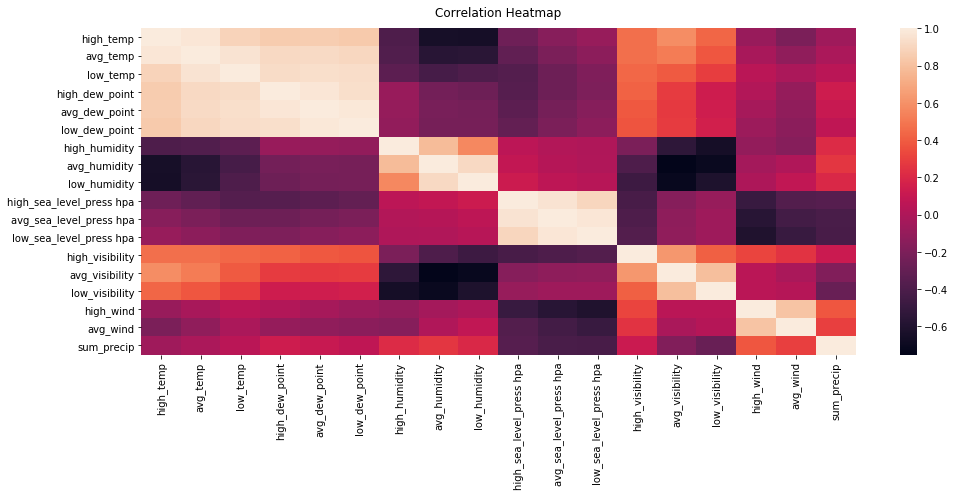

In [28]:
#HeatMap of correlation matrix 
colleration_matrix= paris_weather.corr()
plt.figure(figsize=(16, 6))
heatmap = sn.heatmap(colleration_matrix)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

From the above figure, there are variables that are more correlated being either positively or negatively. An example would be the negative correlation between average visibility and average humidity. The same applies to the negative correlation between high temp and low humidity. This would help us in feature selection since we don't have to use independent variables that are highly correlated in modelling because they almost end up contributing the same towards the model

#### Loading Energy Consumption dataset 

In [34]:
## Loading the dataset and formating the columns 
Historique_consommation= pd.read_excel("Historique_consommation_JOUR_2017.xls")
Historique_consommation=Historique_consommation.dropna()
Historique_consommation.columns=Historique_consommation.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('MWh','')
Historique_consommation.columns=Historique_consommation.columns.str.strip()
Historique_consommation=Historique_consommation.reset_index()
Historique_consommation=Historique_consommation.drop('index',axis=1)
Historique_consommation

,date,type,energie_journalière_mwh
0,01/01/2017,Définitives,1652084.0
1,02/01/2017,Définitives,1768332.0
2,03/01/2017,Définitives,1886120.0
3,04/01/2017,Définitives,1923775.0
4,05/01/2017,Définitives,1887470.0
...,...,...,...
360,27/12/2017,Définitives,1582970.0
361,28/12/2017,Définitives,1664743.0
362,29/12/2017,Définitives,1668623.0
363,30/12/2017,Définitives,1437082.0


#### Understanding Relationship between Energy consumption and temparature

In [35]:
Historique_consommation['date'] = pd.to_datetime(Historique_consommation['date'])
Historique_consommation["temp"]= paris_weather["avg_temp"]
paris_weather["avg_temp"]
temp = paris_weather["avg_temp"]
merged_energy_temperature = Historique_consommation.join(temp)
merged_energy_temperature=merged_energy_temperature.drop('temp',axis=1)
merged_energy_temperature

,date,type,energie_journalière_mwh,avg_temp
0,2017-01-01,Définitives,1652084.0,-3
1,2017-02-01,Définitives,1768332.0,0
2,2017-03-01,Définitives,1886120.0,0
3,2017-04-01,Définitives,1923775.0,2
4,2017-05-01,Définitives,1887470.0,3
...,...,...,...,...
360,2017-12-27,Définitives,1582970.0,4
361,2017-12-28,Définitives,1664743.0,2
362,2017-12-29,Définitives,1668623.0,3
363,2017-12-30,Définitives,1437082.0,10


After synchronizing the dates of weather and energy consumption timeseries, the following the scatter plot of energy consumption against mean temperature. The scatter plot is in a curve form, which is an indication that there is high chance of nonlinear relationship between the two variables.

### Fitting quadratic model predecting energy consumption based on temperature

Text(0.5, 1.0, 'Energy Comsumption against Mean Temparature ')

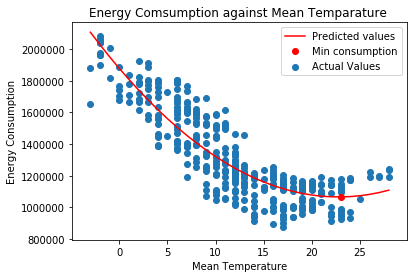

In [9]:
curve=np.polyfit(merged_energy_temperature['avg_temp'],merged_energy_temperature['energie_journalière_mwh'],2)
predicted = np.polyval(curve, merged_energy_temperature['avg_temp'])

avg_temp_and_predicted = {'temp':merged_energy_temperature["avg_temp"], 'predicted': predicted}
avg_temp_and_predicted_new= pd.DataFrame(data=avg_temp_and_predicted)
avg_temp_and_predicted_new=avg_temp_and_predicted_new.sort_values(by=['temp'])
plt.plot(avg_temp_and_predicted_new["temp"],avg_temp_and_predicted_new["predicted"],color="red")
plt.scatter(merged_energy_temperature["avg_temp"],merged_energy_temperature["energie_journalière_mwh"])
sorted_by_min_consumption= avg_temp_and_predicted_new.sort_values(by=['predicted'])
sorted_by_min_consumption=sorted_by_min_consumption.iloc[0].to_numpy()
plt.plot(sorted_by_min_consumption[0],sorted_by_min_consumption[1], 'ro')
plt.legend(["Predicted values","Min consumption", "Actual Values"], loc ="upper right") 
plt.xlabel("Mean Temperature")
plt.ylabel("Energy Consumption")
plt.title("Energy Comsumption against Mean Temparature ")

From the above plot, the quadratic model explains our data better, since the distance between the fitted line and actual values is small. The plot also illustrates the minimum energy consumption and its corresponding temperature. This plot only focuses on predicting energy consumption based only avergage temparature

#### Combining Energy Consumption with Weather variables 

In this section, we are going to predict energy consumption based on all weather variables. However, we go through the process of feature selection and feature engineering to improve our model 

#### Merging the two datasets for better analysis

In [36]:
combined_dataset=paris_weather.join(merged_energy_temperature["energie_journalière_mwh"])
combined_dataset_no_date=combined_dataset.drop(["events","high_gust_wind","date"],axis=1)
combined_dataset_no_date

,high_temp,avg_temp,low_temp,high_dew_point,avg_dew_point,low_dew_point,high_humidity,avg_humidity,low_humidity,high_sea_level_press hpa,avg_sea_level_press hpa,low_sea_level_press hpa,high_visibility,avg_visibility,low_visibility,high_wind,avg_wind,sum_precip,energie_journalière_mwh
0,0,-3,-5,-1,-3,-6,100,94,86,1030,1023,1020,7.0,3.0,0.0,10,6,0,1652084.0
1,2,0,-2,1,1,-1,100,95,88,1030,1025,1022,14.0,4.0,0.0,16,6,2,1768332.0
2,1,0,-1,1,0,-1,100,95,88,1032,1030,1028,7.0,2.0,0.0,14,6,0,1886120.0
3,6,2,-1,4,1,-1,100,87,71,1028,1025,1023,19.0,9.0,3.0,23,14,2,1923775.0
4,7,3,1,2,0,-2,93,79,59,1038,1032,1027,19.0,12.0,10.0,14,11,0,1887470.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,6,4,3,5,2,-2,93,82,60,998,987,982,31.0,12.0,6.0,39,24,4,1582970.0
361,6,2,-1,1,-1,-3,93,80,57,1011,1005,999,31.0,16.0,10.0,19,13,0,1664743.0
362,8,3,-1,6,2,-1,100,85,54,1012,1006,1000,31.0,12.0,3.0,32,13,12,1668623.0
363,14,10,6,12,10,4,100,87,73,1011,1006,1000,19.0,9.0,3.0,32,19,3,1437082.0


#### Feature Selection 

After merging the weather variables and energy consumption as a single dataset, considering energy consumption and weather variables as independent variables. Seven variables that were selected by forward stepwise regression which is a feature selection technic.

In [18]:
# forward- stepwise regression
def forward_regression(X, y,
                       threshold_in,
                       verbose=False):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        if not changed:
            break

    return model

independent_variables=combined_dataset_no_date.iloc[:, 0:18]
dependent_variable=combined_dataset_no_date.iloc[:,18:19]
model=forward_regression(independent_variables,dependent_variable,0.05,True)
model.summary()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # Remove the CWD from sys.path while we load stuff.


Add  high_temp                      with p-value 1.82151e-93
Add  high_visibility                with p-value 9.72513e-08
Add  high_humidity                  with p-value 0.000846698
Add  avg_temp                       with p-value 0.014433
Add  low_humidity                   with p-value 7.79481e-06
Add  avg_dew_point                  with p-value 0.00204418
Add  low_sea_level_press hpa        with p-value 0.00718581


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     energie_journalière_mwh   R-squared:                       0.751
Model:                                 OLS   Adj. R-squared:                  0.745
Method:                      Least Squares   F-statistic:                     134.0
Date:                     Sat, 13 Feb 2021   Prob (F-statistic):          1.78e-102
Time:                             13:35:17   Log-Likelihood:                -4840.2
No. Observations:                      365   AIC:                             9698.
Df Residuals:                          356   BIC:                             9733.
Df Model:                                8                                         
Covariance Type:                 nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    4.048e+06   1.04e+06      3.910      0.000    2.01e+06    6.08e+06
high_temp                3583.5107   6401.258      0.560      0.576   -9005.523    1.62e+04
high_visibility         -5717.4500   1583.915     -3.610      0.000   -8832.457   -2602.443
high_humidity           -3118.7532   1651.012     -1.889      0.060   -6365.716     128.209
avg_temp                -5069.0619   1.11e+04     -0.457      0.648   -2.69e+04    1.67e+04
low_humidity             7036.6480   1295.955      5.430      0.000    4487.959    9585.337
avg_dew_point           -3.051e+04   9586.267     -3.182      0.002   -4.94e+04   -1.17e+04
low_sea_level_press hpa -2365.6786    961.950     -2.459      0.014   -4257.498    -473.859
avg_wind                   -1.8424   2012.415     -0.001      0.999   -3959.558    3955.873
==============================================================================
Omnibus:                        1.134   Durbin-Watson:                   0.839
Prob(Omnibus):                  0.567   Jarque-Bera (JB):                1.122
Skew:                           0.012   Prob(JB):                        0.571
Kurtosis:                       2.729   Cond. No.                     1.44e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The above variables are the ones with p-value which is less than the set threshold which is 0.05. And after fitting multivariate linear model using the above variables to predict energy consumption. The resulted coefficient of determination is 0.751 as per the  model summary

#### Feature Engineering 

In this section, we are going to try to make some feature engineering to see if we can improve our model. The first feature engineering we are going to conduct is two discover if our model can improve by squaring the weather variables. After squaring the the terms, all variables will then be passed to forward regression function to see if there is any improvements.

In [19]:
squared_independent_variables= independent_variables * independent_variables
columns=['high_temp2', 'avg_temp2', 'low_temp2', 'high_dew_point2', 'avg_dew_point2',
       'low_dew_point2', 'high_humidity2', 'avg_humidity2', 'low_humidity2',
       "high_sea_level_press_hpa2", 'avg_sea_level_press_hpa2',
       'low_sea_level_press_hpa2', 'high_visibility2', 'avg_visibility2',
       'low_visibility2', 'high_wind2', 'avg_wind2', 'sum_precip2',]

# squared_independent_variables=pd.DataFrame(squared_independent_variables.to_numpy(), columns)
squared_independent_variables.columns= columns
squared_independent_variables

combined_squared_inde_with_indep= independent_variables.join(squared_independent_variables)
model=forward_regression(combined_squared_inde_with_indep,dependent_variable,0.05,True)
model.summary()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # Remove the CWD from sys.path while we load stuff.


Add  high_temp                      with p-value 1.82151e-93
Add  high_temp2                     with p-value 1.18332e-36
Add  high_visibility2               with p-value 0.0300572
Add  high_visibility                with p-value 0.00131632


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     energie_journalière_mwh   R-squared:                       0.807
Model:                                 OLS   Adj. R-squared:                  0.804
Method:                      Least Squares   F-statistic:                     300.1
Date:                     Sat, 13 Feb 2021   Prob (F-statistic):          8.16e-126
Time:                             13:35:29   Log-Likelihood:                -4793.5
No. Observations:                      365   AIC:                             9599.
Df Residuals:                          359   BIC:                             9622.
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      2.081e+06    4.9e+05      4.248      0.000    1.12e+06    3.04e+06
high_temp                 -7.102e+04   3483.304    -20.390      0.000   -7.79e+04   -6.42e+04
high_temp2                 1264.9637     94.424     13.397      0.000    1079.270    1450.658
high_visibility2           -557.5993    155.515     -3.585      0.000    -863.435    -251.764
high_visibility            2.271e+04   7041.143      3.225      0.001    8861.626    3.66e+04
high_sea_level_press_hpa2    -0.1929      0.456     -0.424      0.672      -1.089       0.703
==============================================================================
Omnibus:                        2.478   Durbin-Watson:                   0.990
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                2.335
Skew:                          -0.195   Prob(JB):                        0.311
Kurtosis:                       3.041   Cond. No.                     7.92e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.92e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

After considering the square of each weather variable as new variable, the model has improved from 0.751 to 0.809 (coefficient of determination) and stepwise regression selected some of squared variables to be the part of the new model. The following are new selected variables.

#### Creating dummy variables for the day of the week

Since both weather and energy consumption depends on the day of the week, day of the week would be a good predictor of energy consumption. That is why I created a dummy variables for the day of the week to check if it might improve the model 

In [20]:
combined_squared_inde_with_indep["date"]=combined_dataset['date']
squared_independent_variables
combined_squared_inde_with_indep["day"]=combined_squared_inde_with_indep['date'].dt.day_name();
dummies_day= pd.get_dummies(combined_squared_inde_with_indep["day"])
combined_squared_inde_with_indep=pd.concat([combined_squared_inde_with_indep,dummies_day],axis=1)
combined_squared_inde_with_indep_with_dummy=combined_squared_inde_with_indep.drop(["day","date"],axis=1)
combined_squared_inde_with_indep_with_dummy

,high_temp,avg_temp,low_temp,high_dew_point,avg_dew_point,low_dew_point,high_humidity,avg_humidity,low_humidity,high_sea_level_press hpa,...,high_wind2,avg_wind2,sum_precip2,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,-3,-5,-1,-3,-6,100,94,86,1030,...,100,36,0,0,0,0,1,0,0,0
1,2,0,-2,1,1,-1,100,95,88,1030,...,256,36,4,0,1,0,0,0,0,0
2,1,0,-1,1,0,-1,100,95,88,1032,...,196,36,0,0,0,0,0,0,1,0
3,6,2,-1,4,1,-1,100,87,71,1028,...,529,196,4,0,0,0,0,0,0,1
4,7,3,1,2,0,-2,93,79,59,1038,...,196,121,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,6,4,3,5,2,-2,93,82,60,998,...,1521,576,16,0,0,0,0,0,0,1
361,6,2,-1,1,-1,-3,93,80,57,1011,...,361,169,0,0,0,0,0,1,0,0
362,8,3,-1,6,2,-1,100,85,54,1012,...,1024,169,144,1,0,0,0,0,0,0
363,14,10,6,12,10,4,100,87,73,1011,...,1024,361,9,0,0,1,0,0,0,0


In [194]:
model=forward_regression(combined_squared_inde_with_indep_with_dummy,dependent_variable,0.05,True)
model.summary()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  del sys.path[0]


Add  high_temp                      with p-value 1.82151e-93
Add  high_temp2                     with p-value 1.18332e-36
Add  Sunday                         with p-value 2.02543e-18
Add  Saturday                       with p-value 1.51634e-18
Add  avg_temp                       with p-value 2.22261e-05
Add  low_humidity                   with p-value 2.29513e-06
Add  high_wind2                     with p-value 0.000399405
Add  Monday                         with p-value 0.00398247
Add  sum_precip                     with p-value 0.0117157
Add  avg_temp2                      with p-value 0.026503
Add  high_dew_point2                with p-value 0.016792


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     energie_journalière_mwh   R-squared:                       0.895
Model:                                 OLS   Adj. R-squared:                  0.891
Method:                      Least Squares   F-statistic:                     249.6
Date:                     Sat, 06 Feb 2021   Prob (F-statistic):          6.38e-164
Time:                             19:09:58   Log-Likelihood:                -4682.6
No. Observations:                      365   AIC:                             9391.
Df Residuals:                          352   BIC:                             9442.
Df Model:                               12                                         
Covariance Type:                 nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     2.129e+06    3.9e+05      5.466      0.000    1.36e+06     2.9e+06
high_temp                -1.646e+04   9011.833     -1.826      0.069   -3.42e+04    1265.784
high_temp2                 532.4425    227.968      2.336      0.020      84.091     980.794
Sunday                   -1.997e+05   1.43e+04    -13.990      0.000   -2.28e+05   -1.72e+05
Saturday                 -1.543e+05   1.43e+04    -10.758      0.000   -1.83e+05   -1.26e+05
avg_temp                 -5.124e+04   8731.852     -5.868      0.000   -6.84e+04   -3.41e+04
low_humidity              3629.4640    532.630      6.814      0.000    2581.927    4677.001
high_wind2                  60.8476     17.377      3.502      0.001      26.671      95.024
Monday                   -3.989e+04   1.44e+04     -2.766      0.006   -6.82e+04   -1.15e+04
sum_precip               -4881.1337   2135.791     -2.285      0.023   -9081.650    -680.618
avg_temp2                 1036.5329    331.866      3.123      0.002     383.842    1689.223
high_dew_point2           -345.8696    142.622     -2.425      0.016    -626.368     -65.371
avg_sea_level_press_hpa2    -0.3774      0.368     -1.026      0.306      -1.101       0.346
==============================================================================
Omnibus:                       12.914   Durbin-Watson:                   0.958
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               22.297
Skew:                          -0.200   Prob(JB):                     1.44e-05
Kurtosis:                       4.143   Cond. No.                     8.39e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.39e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

After including dummy variables for the day of the week, the model improved from 0.809 to 0.895 which shows that day of the week has huge impact on the performance of the model. The selected days of the week are Monday, Saturday, and Sunday together whether a mix of squared terms and unsquared terms.

# Conclusion

To conclude, I have realized that the energy consumption is highly correlated with weather variables and we can predict energy consumption using weather variables and that feature engineeering can improve the model. However, the main challenge I faced in implementation of the project is **time** but if I had enough time I would have done cross validation technics and trying other modellling traing techniques. But the main objective of the project was achieved which was assessing if there is relationship between energy consumption and weather variables and if we can model energy consumption using weather variables. 